In [2]:
import numpy as np
import pandas as pd

In [35]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Config

In [180]:
random_state = 1291

feature_cols = ["PC", "RA", "SA1", "FiringRate_value","Spikes_diff_mean", "depth", "Pin_Radius"] #"Spikes_n_items",  
target_col = "Frequency"

# Load Data

In [181]:
dataset = pd.read_csv("../data/dataset_v1.csv", index_col=0)
print(dataset.shape)
dataset.sample(5)

(12499, 9)


,PC,RA,SA1,FiringRate_value,Spikes_n_items,Spikes_diff_mean,depth,Pin_Radius,Frequency
9815,1,0,0,72.100,102,0.013590,1.78,0.345,75
10204,0,1,0,1.900,2,0.446800,2.77,0.470,95
9190,1,0,0,145.600,166,0.006739,1.15,0.980,75
10578,1,0,0,5.453,8,0.192886,0.30,0.755,5
9538,0,1,0,88.700,164,0.011179,0.62,0.970,45


# Split

In [182]:
X, y = dataset[feature_cols], dataset[target_col]

# Model

In [220]:
enet = ElasticNetCV(
    l1_ratio=0.1,
    eps=0.001,
    n_alphas=1000,
    random_state=random_state)

In [221]:
enet.fit(X, y)

ElasticNetCV(l1_ratio=0.1, n_alphas=1000, random_state=1291)

In [222]:
enet.score(X,y)

0.20316651771390137

# Evaluate

In [223]:
pred_y = enet.predict(X)

/home/minesh_1291/anaconda3/envs/noaa-runtime/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

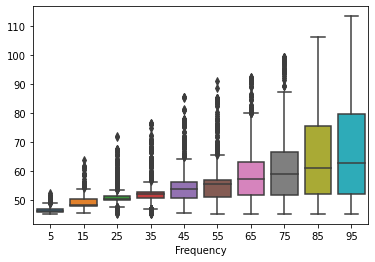

In [224]:
sns.boxplot(y, pred_y) # ,".")

In [225]:
r2_score(y, pred_y)

0.20316651771390137

# Interpretation

In [226]:
enet.alpha_

7.228251642825786

In [227]:
enet.l1_ratio_

0.1

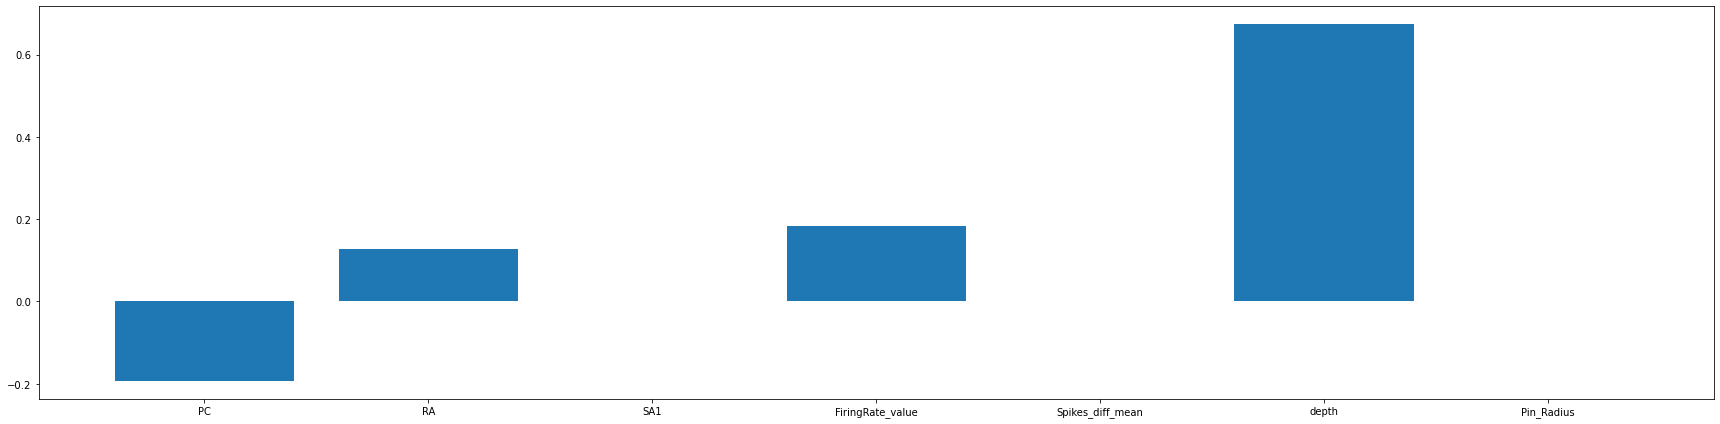

In [228]:
plt.subplots(figsize=(24,6))
plt.bar(feature_cols, enet.coef_)
plt.tight_layout()